# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset('penguins')

In [4]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

The Dataset cosists of 7 columns.
1- Species the penguin belong to Adelie, Chinstrap, Gentoo
2- Culmen_length_mm a numeric in milimeters
3- Culmen_depth_mm a numeric in milimeters
4- flipper_lenghth_mm a numeric in milimeters
5- body_mass_g a numeric in grams
6- island
7- sex is a Male or Female


Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [6]:
df.sample()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
170,Chinstrap,Dream,46.4,18.6,190.0,3450.0,Female


In [7]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float32 
 3   bill_depth_mm      333 non-null    float32 
 4   flipper_length_mm  333 non-null    float32 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    category
dtypes: category(3), float32(3), float64(1)
memory usage: 10.5 KB


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [30]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [14]:
df.isnull().mean() * 100
df.dropna(inplace=True)

In [45]:
df.isnull().mean() * 100

species              0.0
island               0.0
bill_length_mm       0.0
bill_depth_mm        0.0
flipper_length_mm    0.0
body_mass_g          0.0
sex                  0.0
dtype: float64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [8]:
mem_usage_before = df.memory_usage(deep=True)

In [18]:
# convert categotical types
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [19]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')

Calculate memory saved after type conversion

In [21]:
mem_usage_after = df.memory_usage(deep=True)

In [22]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 63 KB


# Step 5

#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [26]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo']
['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen']
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [29]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')
df.describe(exclude='number').T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

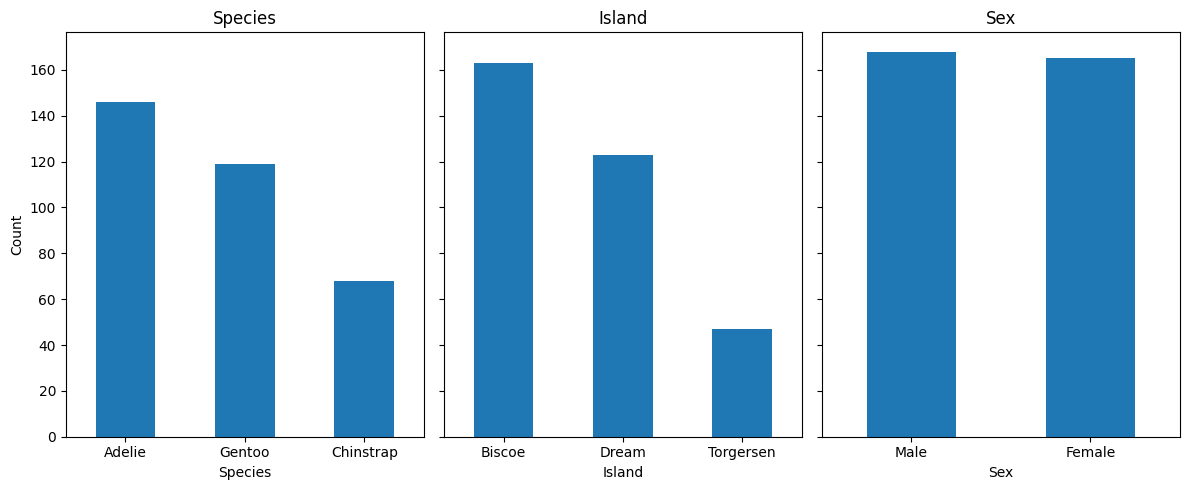

In [56]:
columns_to_plot = ['species', 'island', 'sex']
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(12, 5), sharey=True)
for i, column in enumerate(columns_to_plot):
    df[column].value_counts().plot(kind='bar', ax=ax[i], rot=0)
    ax[i].set_title(column.capitalize())
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(column.capitalize())

plt.tight_layout()
plt.show()

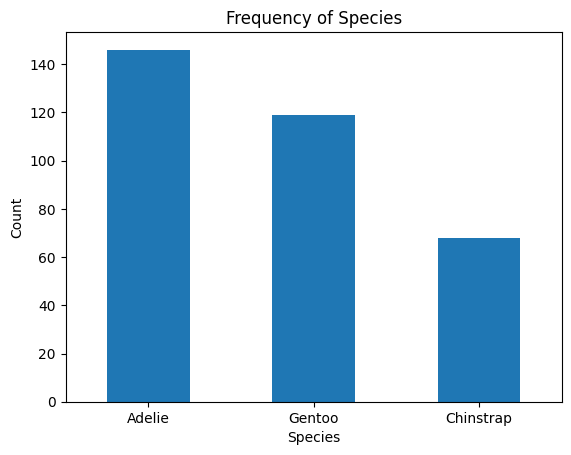

In [35]:
df['species'].value_counts().plot(kind='bar', xlabel='Species', ylabel='Count', rot=0)
plt.title('Frequency of Species')
plt.show()

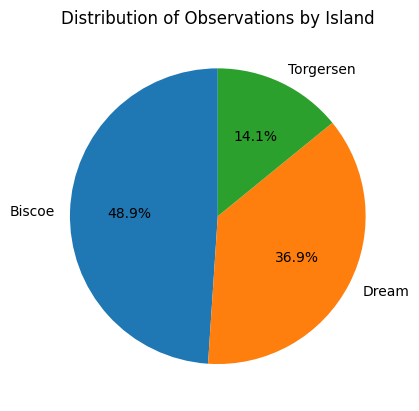

In [36]:
df['island'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Observations by Island')
plt.ylabel('')
plt.show()


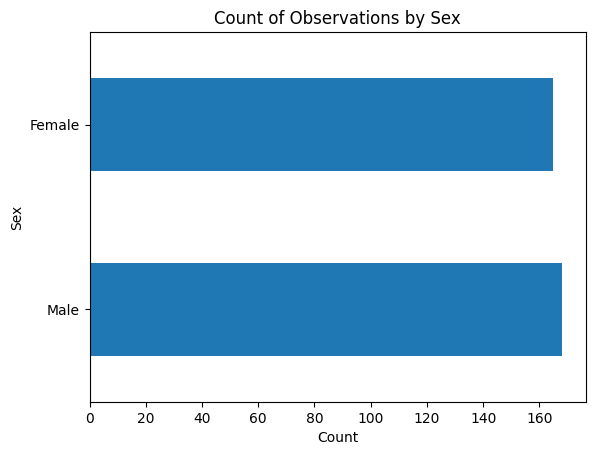

In [37]:
df['sex'].value_counts().plot(kind='barh', xlabel='Count', ylabel='Sex')
plt.title('Count of Observations by Sex')
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

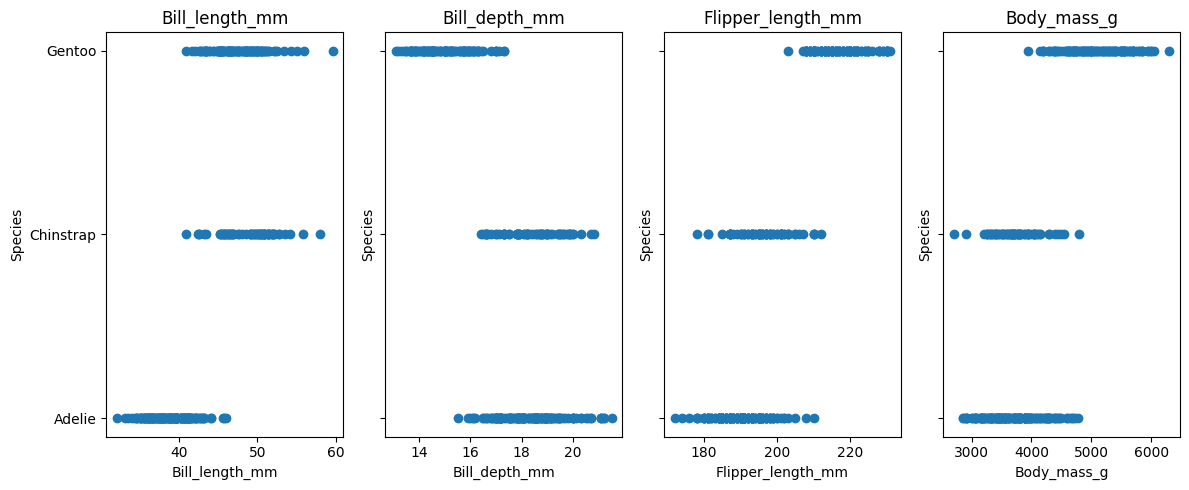

In [64]:
columns_to_plot = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
fig, ax = plt.subplots(1, len(columns_to_plot), figsize=(12, 5), sharey=True)
for i, column in enumerate(columns_to_plot):
    
    ax[i].scatter(df[column], df['species'])
    ax[i].set_title(column.capitalize())
    ax[i].set_xlabel(column.capitalize())
    ax[i].set_ylabel('Species')
plt.tight_layout()
plt.show()


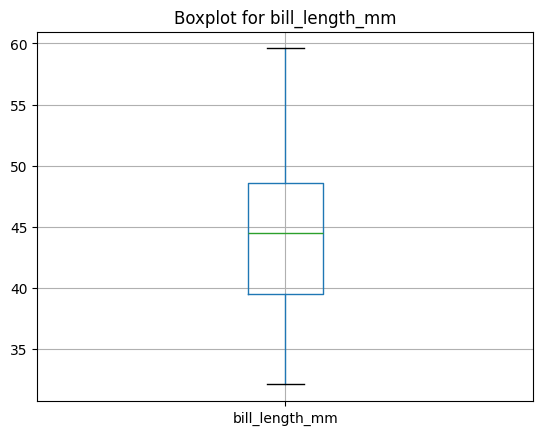

In [38]:
df.boxplot(column='bill_length_mm')
plt.title('Boxplot for bill_length_mm')
plt.show()

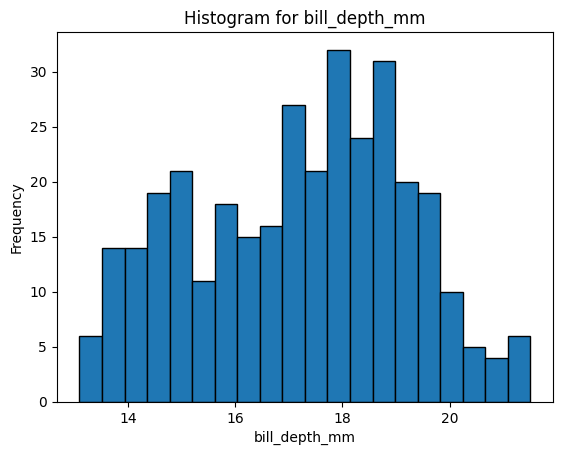

In [40]:
df['bill_depth_mm'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histogram for bill_depth_mm')
plt.xlabel('bill_depth_mm')
plt.ylabel('Frequency')
plt.show()

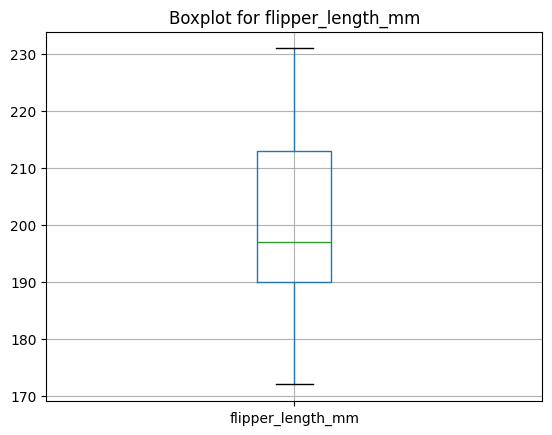

In [41]:
df.boxplot(column='flipper_length_mm')
plt.title('Boxplot for flipper_length_mm')
plt.show()

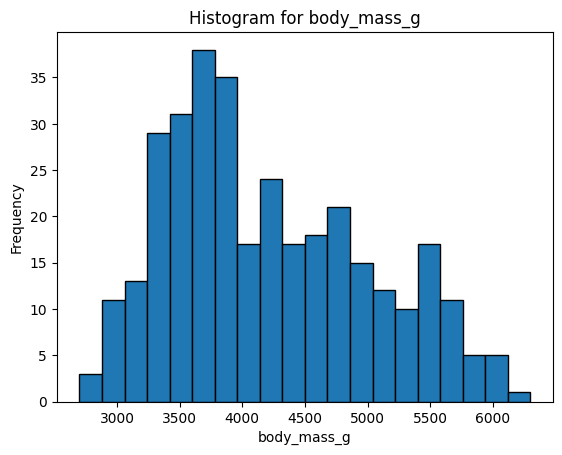

In [42]:
df['body_mass_g'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Histogram for body_mass_g')
plt.xlabel('body_mass_g')
plt.ylabel('Frequency')
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

<Axes: >

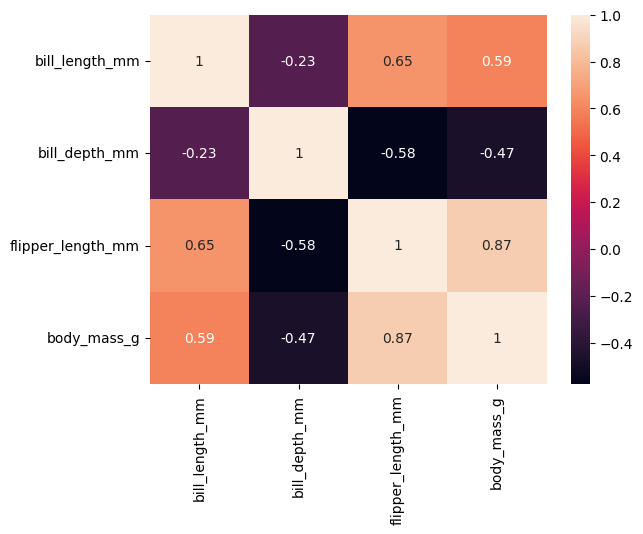

In [44]:
numerical_corr = df.select_dtypes(include='number').corr()
sns.heatmap(numerical_corr, annot=True)

Write down your observations based on the correlation heatmap.

Observations:

There is a moderate positive correlation (0.65) between bill length (mm) and flipper length (mm), as the bill length increases, the flipper length tends to icrease as well.
There is weak negative correlation (-0.58) between bill depth (mm) and flipper length(mm), and the bill depth increases, the flipper length tends to decrease slightly.
There is a weak negative correlation (-0.47) between bill depth (mm) and body mass(g) and the bill depth increases, the body mass tends to decrease slightly
There is a strong positive correlation (0.87) between flipper length (mm) and body mass (g), and the flipper length increases, the body mass tends to increase significantly


### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [51]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.200001,13.700000,214.0,4925.0,Female
340,Gentoo,Biscoe,46.799999,14.300000,215.0,4850.0,Female
341,Gentoo,Biscoe,50.400002,15.700000,222.0,5750.0,Male
342,Gentoo,Biscoe,45.200001,14.800000,212.0,5200.0,Female


In [52]:
df['bill_size'] = df['bill_length_mm'] * df['bill_depth_mm']
df['bill_ratio'] = df['bill_length_mm'] / df['bill_depth_mm']

In [53]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,bill_size,bill_ratio
0,Adelie,Torgersen,39.099998,18.700001,181.0,3750.0,Male,731.169983,2.090909
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.0,Female,687.299988,2.270115
2,Adelie,Torgersen,40.299999,18.000000,195.0,3250.0,Female,725.399963,2.238889
4,Adelie,Torgersen,36.700001,19.299999,193.0,3450.0,Female,708.309998,1.901554
5,Adelie,Torgersen,39.299999,20.600000,190.0,3650.0,Male,809.580017,1.907767


In [54]:
corr = df.corr(numeric_only=True)

<Axes: >

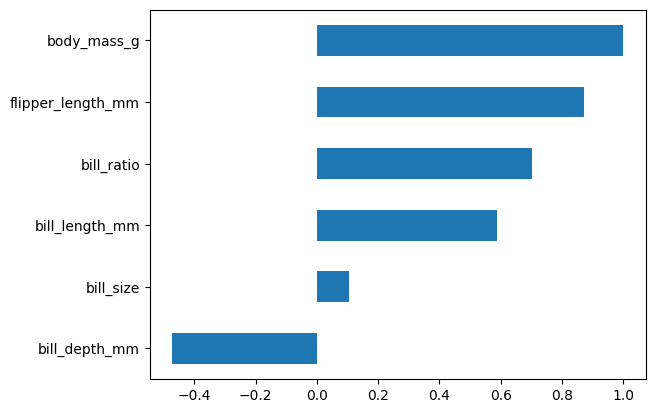

In [55]:
corr['body_mass_g'].sort_values().plot.barh()

Let's look at the correlation to see whether the newly created features are better.

In [ ]:
# This plots the correlation values for a specific column
# which is usually what we are interested in

# corr['body_mass_g'].sort_values().plot.barh()